# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

ANALYSIS - Latitude vs Temperature Plot: This scatterplot shows that temperature increases near the equator. We can see a rising trend as we head towards the equator and a falling trend as we move away.

ANALYSIS - Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression: It was surprising to see positive linear regression from both the northern and southern hemisphere graphs. This suggests that the higher the latitude, the higher probability of cloudiness.

ANALYSIS - Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: The nother hemisphere shows positive linear regression while the southern shows negative. This suggests that wind speeds are higher at lower and higher latitudes, but not as instense towards the equator.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy

from api_keys import weather_api_key

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

634

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : rikitea
Processing Record 2 of Set 1 : amga
Processing Record 3 of Set 1 : yerbogachen
Processing Record 4 of Set 1 : saldanha
Processing Record 5 of Set 1 : ushuaia
Processing Record 6 of Set 1 : new norfolk
Processing Record 7 of Set 1 : kungurtug
Processing Record 8 of Set 1 : butaritari
Processing Record 9 of Set 1 : kavieng
Processing Record 10 of Set 1 : kapaa
Processing Record 11 of Set 1 : panzhihua
City not found. Skipping...
Processing Record 12 of Set 1 : perigueux
Processing Record 13 of Set 1 : brae
Processing Record 14 of Set 1 : mar del plata
Processing Record 15 of Set 1 : makakilo city
Processing Record 16 of Set 1 : vaini
Processing Record 17 of Set 1 : inhambane
Processing Record 18 of Set 1 : cotonou
Processing Record 19 of Set 1 : punta arenas
Processing Record 20 of Set 1 : carnarvon
Processing Record 21 of Set 1 : san andres
Processing Record 22 of Set 1 : thompson
Processing R

Processing Record 41 of Set 4 : marzuq
Processing Record 42 of Set 4 : ust-kuyga
Processing Record 43 of Set 4 : walker
Processing Record 44 of Set 4 : gatehouse of fleet
City not found. Skipping...
Processing Record 45 of Set 4 : beira
Processing Record 46 of Set 4 : maloy
Processing Record 47 of Set 4 : khash
Processing Record 48 of Set 4 : cooma
Processing Record 49 of Set 4 : gimli
Processing Record 50 of Set 4 : buritis
Processing Record 0 of Set 5 : la teste-de-buch
Processing Record 1 of Set 5 : chuy
Processing Record 2 of Set 5 : lebu
Processing Record 3 of Set 5 : swansea
Processing Record 4 of Set 5 : kokstad
Processing Record 5 of Set 5 : coihaique
Processing Record 6 of Set 5 : clarence town
Processing Record 7 of Set 5 : sao felix do xingu
Processing Record 8 of Set 5 : minuri
City not found. Skipping...
Processing Record 9 of Set 5 : bodden town
Processing Record 10 of Set 5 : east london
Processing Record 11 of Set 5 : ulaanbaatar
Processing Record 12 of Set 5 : ishigaki

Processing Record 22 of Set 8 : shimoda
Processing Record 23 of Set 8 : zielona gora
Processing Record 24 of Set 8 : vulcanesti
Processing Record 25 of Set 8 : cidreira
Processing Record 26 of Set 8 : killybegs
Processing Record 27 of Set 8 : araouane
Processing Record 28 of Set 8 : cabedelo
Processing Record 29 of Set 8 : les cayes
Processing Record 30 of Set 8 : fairbanks
Processing Record 31 of Set 8 : jumla
Processing Record 32 of Set 8 : pallasovka
Processing Record 33 of Set 8 : nouadhibou
Processing Record 34 of Set 8 : preobrazheniye
Processing Record 35 of Set 8 : karratha
Processing Record 36 of Set 8 : laguna
Processing Record 37 of Set 8 : rajshahi
Processing Record 38 of Set 8 : hovd
Processing Record 39 of Set 8 : codrington
Processing Record 40 of Set 8 : okhotsk
City not found. Skipping...
Processing Record 41 of Set 8 : estelle
City not found. Skipping...
Processing Record 42 of Set 8 : baykit
Processing Record 43 of Set 8 : impfondo
Processing Record 44 of Set 8 : mug

Processing Record 4 of Set 12 : xiongyue
Processing Record 5 of Set 12 : mitsamiouli
Processing Record 6 of Set 12 : launceston
Processing Record 7 of Set 12 : zambrow
Processing Record 8 of Set 12 : safford
Processing Record 9 of Set 12 : trelew
Processing Record 10 of Set 12 : valenca do piaui
Processing Record 11 of Set 12 : barcelona
City not found. Skipping...
Processing Record 12 of Set 12 : adolfo lopez mateos
Processing Record 13 of Set 12 : boshnyakovo
Processing Record 14 of Set 12 : prince rupert
Processing Record 15 of Set 12 : tabou
Processing Record 16 of Set 12 : kourou
Processing Record 17 of Set 12 : vila velha
Processing Record 18 of Set 12 : valenca
Processing Record 19 of Set 12 : murgab
Processing Record 20 of Set 12 : rockland
Processing Record 21 of Set 12 : san carlos de bariloche
Processing Record 22 of Set 12 : zhuhai
Processing Record 23 of Set 12 : manaure
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_city_data = pd.DataFrame(weather_dict)
weather_city_data.to_csv('output_data/weather_city_data.csv',index=False)
weather_city_data.count()

City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Lat           584
Lng           584
Max Temp      584
Wind Speed    584
dtype: int64

In [6]:
weather_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,81,PF,1603347253,73,-23.12,-134.97,74.07,2.55
1,Amga,100,RU,1603347130,95,60.90,131.96,23.70,3.96
2,Yerbogachën,100,RU,1603347128,97,61.28,108.01,31.53,10.38
3,Saldanha,0,ZA,1603347254,82,-33.01,17.94,57.20,8.05
4,Ushuaia,75,AR,1603347125,61,-54.80,-68.30,46.40,3.36


In [7]:
indexNames = weather_city_data[weather_city_data['Humidity'] > 100].index
weather_city_data.drop(indexNames, inplace = True)
weather_city_data.count()

City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Lat           584
Lng           584
Max Temp      584
Wind Speed    584
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

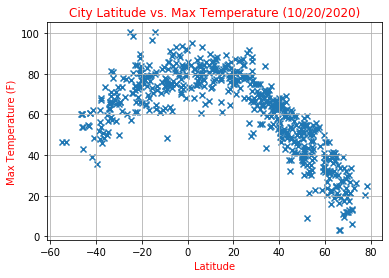

In [34]:
# Latitude vs Temperature Plot
# Plot the scatter plot
plt.scatter(weather_city_data['Lat'], weather_city_data['Max Temp'], edgecolor="black", marker="x")

plt.title("City Latitude vs. Max Temperature (10/20/2020)", color='red')
plt.ylabel("Max Temperature (F)", color='red')
plt.xlabel("Latitude", color='red')
plt.grid(True)

# Saved the scatter plot as a png image
plt.savefig('output_data/Latitude vs. Temperature Plot.png')
plt.show()

## Latitude vs. Humidity Plot

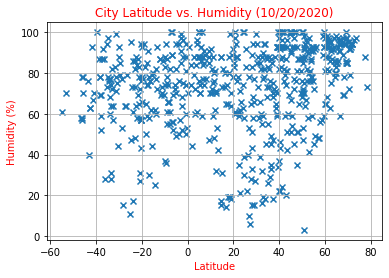

In [33]:
# Latitude vs Humidity Plot
# Plot the scatter plot
plt.scatter(weather_city_data['Lat'], weather_city_data['Humidity'], edgecolor="black", marker="x")

plt.title("City Latitude vs. Humidity (10/20/2020)", color='red')
plt.ylabel("Humidity (%)", color='red')
plt.xlabel("Latitude", color='red')
plt.grid(True)

# Saved the scatter plot as a png image
plt.savefig('output_data/Latitude vs. Humidity Plot.png')
plt.show()

## Latitude vs. Cloudiness Plot

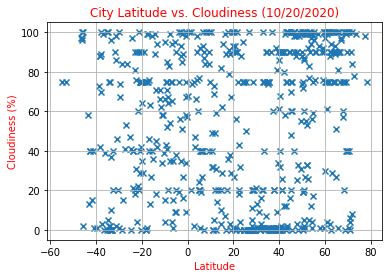

In [32]:
# Latitude vs Cloudiness Plot
# Plot the scatter plot
plt.scatter(weather_city_data['Lat'], weather_city_data['Cloudiness'], edgecolor="black", marker="x")

plt.title("City Latitude vs. Cloudiness (10/20/2020)", color='red')
plt.ylabel("Cloudiness (%)", color='red')
plt.xlabel("Latitude", color='red')
plt.grid(True)

# Saved the scatter plot as a png image
plt.savefig('output_data/Latitude vs. Cloudiness Plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

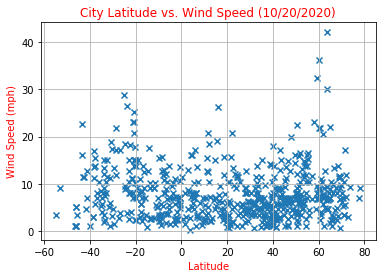

In [31]:
# Latitude vs Wind Speed Plot
# Plot the scatter plot
plt.scatter(weather_city_data['Lat'], weather_city_data['Wind Speed'], edgecolor="black", marker="x")

plt.title("City Latitude vs. Wind Speed (10/20/2020)", color='red')
plt.ylabel("Wind Speed (mph)", color='red')
plt.xlabel("Latitude", color='red')
plt.grid(True)

# Saved the scatter plot as a png image
plt.savefig('output_data/Latitude vs. Wind Speed Plot.png')
plt.show()

## Linear Regression

In [22]:
# Split the DataFrame into a Northern Hemisphere and Southern Hemisphere
northern_hemisphere = weather_city_data.loc[weather_city_data["Lat"] >= 0]
southern_hemisphere = weather_city_data.loc[weather_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8972165737468372


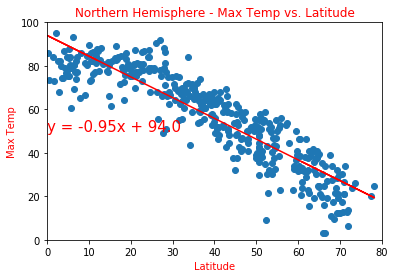

In [23]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression  
# Set up the linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter graph and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50), fontsize=15,color="red")

plt.ylim(0, 100)
plt.xlim(0, 80)

plt.title("Northern Hemisphere - Max Temp vs. Latitude", color='red')
plt.xlabel("Latitude", color='red')
plt.ylabel("Max Temp", color='red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6507425598132126


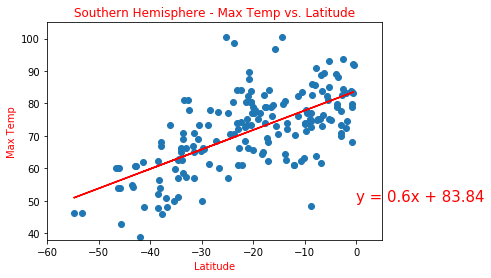

In [24]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Set up the linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter graph and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50), fontsize=15,color="red")

plt.ylim(38, 105)
plt.xlim(-60, 5)

plt.title("Southern Hemisphere - Max Temp vs. Latitude", color='red')
plt.xlabel("Latitude", color='red')
plt.ylabel("Max Temp", color='red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24948892291534092


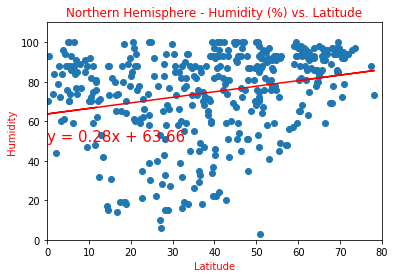

In [25]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Set up the linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter graph and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50), fontsize=15,color="red")

plt.ylim(0, 110)
plt.xlim(0, 80)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude", color='red')
plt.xlabel("Latitude", color='red')
plt.ylabel("Humidity", color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08537686806273069


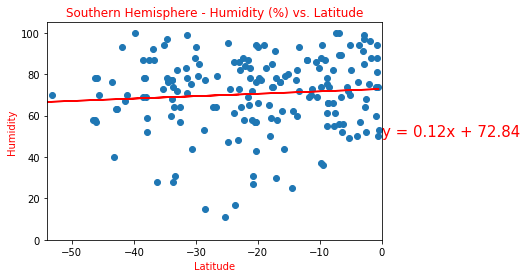

In [26]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Set up the linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter graph and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50), fontsize=15,color="red")

plt.ylim(0, 105)
plt.xlim(-54, 0)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude", color='red')
plt.xlabel("Latitude", color='red')
plt.ylabel("Humidity", color='red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23691213333102248


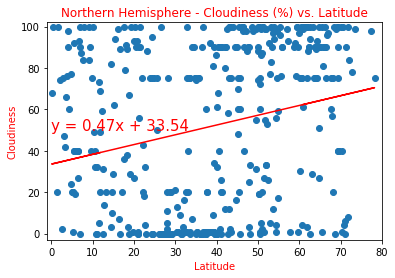

In [27]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Set up the linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter graph and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50), fontsize=15,color="red")

plt.ylim(-3, 102)
plt.xlim(-1, 80)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude", color='red')
plt.xlabel("Latitude", color='red')
plt.ylabel("Cloudiness", color='red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08148387612549217


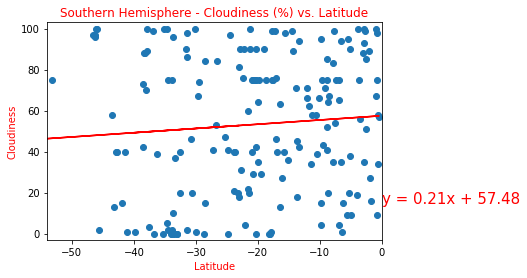

In [28]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Set up the linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter graph and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15), fontsize=15,color="red")

plt.ylim(-3, 103)
plt.xlim(-54, 0)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude", color='red')
plt.xlabel("Latitude", color='red')
plt.ylabel("Cloudiness", color='red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13447929201473954


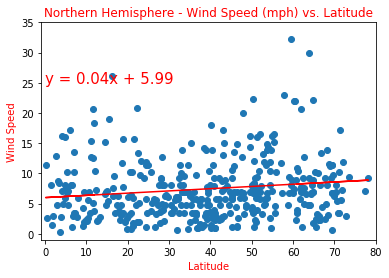

In [29]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Set up the linear regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter graph and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25), fontsize=15,color="red")

plt.ylim(-1, 35)
plt.xlim(-1, 80)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude", color='red')
plt.xlabel("Latitude", color='red')
plt.ylabel("Wind Speed", color='red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1313576168325266


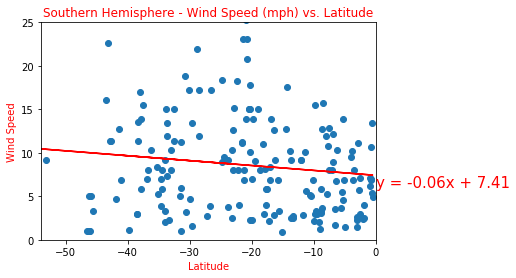

In [30]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Set up the linear regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter graph and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,6), fontsize=15,color="red")

plt.ylim(0, 25)
plt.xlim(-54, 0)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude", color='red')
plt.xlabel("Latitude", color='red')
plt.ylabel("Wind Speed", color='red')
plt.show()